# MNIST digits data set classification using ANN

## Get the data

The dataset for MNIST can be downloaded from the [kaggle link](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?select=mnist_train.csv).

Download both _mnist_train.csv_ and _mnist_test.csv_ files in zip format. Unzip them and store them in a folder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("./MNIST_data/mnist_train.csv")
test_data = pd.read_csv("./MNIST_data/mnist_test.csv")

In [3]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data.shape

(60000, 785)

In [6]:
test_data.shape

(10000, 785)

The data is already flattened. i.e. each image is now a flat array of 784 values. In order to visualize the images we need to convert the into $28\times28$ matrix

## Visualize the data

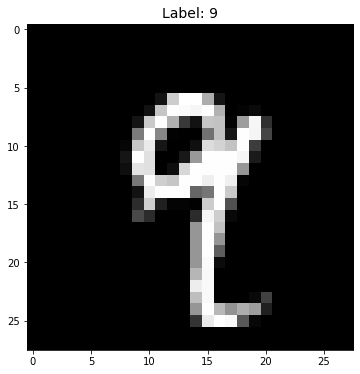

In [7]:
image_no = 2434

plt.figure(figsize=(6,6))
plt.imshow(train_data.iloc[image_no, 1:].values.reshape(28,28), cmap='gray')
plt.title("Label: "+str(train_data.iloc[image_no, 0]), fontsize=14)
plt.show()

## Data Preprocessing

### Target and the features

In [8]:
y_train = train_data.loc[:, 'label'].values

In [9]:
X_train = train_data.iloc[:, 1:].values

In [10]:
y_train.shape, X_train.shape

((60000,), (60000, 784))

### Scalling the features

In [11]:
X_train = X_train.astype('float')/255.0

In [12]:
X_train.max()

1.0

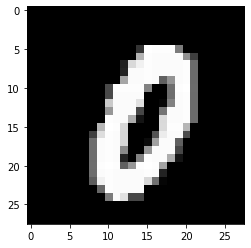

In [13]:
plt.imshow(X_train[34,:].reshape(28,28), cmap='gray')

### One hot encoding the labels

In [14]:
from keras.utils import np_utils

In [16]:
y_train = np_utils.to_categorical(y_train)

In [17]:
y_train.shape

(60000, 10)

## Building the MLP ANN

In [18]:
import tensorflow as tf

In [19]:
inp = tf.keras.Input(X_train[0].shape)
h1 = tf.keras.layers.Dense(units=X_train.shape[1], activation='relu')(inp)
op = tf.keras.layers.Dense(units=y_train.shape[1], activation='softmax')(h1)
model = tf.keras.Model(inputs=inp, outputs=op)

In [20]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


## Compile and train the model

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 2/10
1200/1200 [==============================] - 8s 6ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 3/10
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 4/10
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 5/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0040 - accuracy: 0.9992
Epoch 6/10
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 7/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 8/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0043 - accuracy: 0.9990
Epoch 9/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 10/10
1200/1200 [==============================] - 8s 7ms/step - loss: 0.00

## Evaluate the model performance

In [27]:
X_test = test_data.iloc[:,1:].values
X_test = X_test.astype('float')/255.0
y_test = test_data.loc[:,'label'].values

In [28]:
y_pred_values = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [30]:
y_pred_values.shape

(10000, 10)

In [32]:
y_test.shape

(10000,)

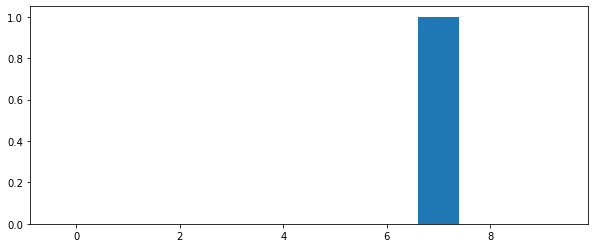

In [35]:
value = 0
plt.figure(figsize=(10,4))
plt.bar(x=np.arange(0,10), height=y_pred_values[value])
plt.show()

In [34]:
y_test[0]

7

In [37]:
y_pred = y_pred_values.argmax(axis=1)

In [38]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9839

**Confusion Matrix**

In [57]:
def create_confusion_matrix(n_class, y_true, y_pred):
    cm = np.zeros(shape=(n_class,n_class), dtype='int')
    assert y_true.shape == y_pred.shape, "Shape of y_true and y_pred should be same"
    for i in range(y_true.shape[0]):
        r = y_true[i]
        c = y_pred[i]
        cm[r,c] += 1
    rows = ['true-'+str(x) for x in range(n_class)]
    cols = ['pred-'+str(x) for x in range(n_class)]
    df = pd.DataFrame(cm, index=rows, columns=cols)
    plt.figure(figsize=(7,7))
    plt.imshow(cm, cmap='gray')
    plt.show()
    return df

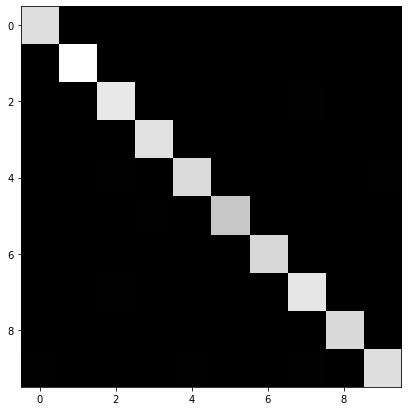

In [58]:
df = create_confusion_matrix(n_class=10, y_true=y_test, y_pred=y_pred)

In [59]:
df

,pred-0,pred-1,pred-2,pred-3,pred-4,pred-5,pred-6,pred-7,pred-8,pred-9
true-0,975,1,1,0,0,0,2,1,0,0
true-1,1,1123,2,2,0,0,2,0,4,1
true-2,1,0,1018,1,1,0,1,5,4,1
true-3,1,0,2,995,0,3,0,4,3,2
true-4,4,2,6,0,961,0,1,1,0,7
true-5,2,0,0,7,1,876,4,0,2,0
true-6,2,2,2,1,2,2,946,0,1,0
true-7,4,0,8,1,0,0,0,1010,3,2
true-8,1,0,4,3,0,1,0,2,960,3
true-9,6,4,3,2,5,4,1,5,4,975
